In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
tweets_df = pd.read_csv('cleaned-tsla-tweets.csv').iloc[:, [0, 1, 4]]
tweets_df.date = pd.to_datetime(tweets_df.date)
tweets_df = tweets_df.dropna()

tweets_df.head()

,id,date,cleaned_tweet
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands su...
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply c...
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two...


In [6]:
tweets_df['sentiment_score'] = tweets_df.cleaned_tweet.apply(lambda x: TextBlob(x).sentiment.polarity)

In [7]:
pd.options.display.max_colwidth = 300
tweets_df.sample(n=10).drop(columns=['id', 'date']).rename(columns={'tweet': 'Original Tweet', 
                                                                    'cleaned_tweet': 'Cleaned Tweet', 
                                                                    'sentiment_score': 'Sentiment Score'}).head(10)

,Cleaned Tweet,Sentiment Score
2641,cordtcourtin know also never ever see short like,0.000000
80872,someone pase tell fred go large world pay attention would realize build one stall giga shanghai row cc electrekco,0.214286
81296,trading idea upside flushpoint,0.000000
40827,market close daily fintwit update across account track top mentioned stock pay service amd aapl nvda mu msft tdoc tlry pay service spy codx atvi amzn mrna see,0.250000
86290,ups nflx dkng msft abt,0.000000
101945,stock could surge accord analyst,0.000000
73609,zerogravitymke cathiedwood velodynelidar big fan guess back elon view,0.000000
94438,com twitter let get stevenmarkryan k subscriber youtube solvingthemoneyproblem,0.000000
21858,coronavirus,0.000000
17046,inc close market cap b motors nasda ev automotive,0.000000


C:\Users\gsaik\AppData\Local\Temp\ipykernel_9120\1523202472.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=14)


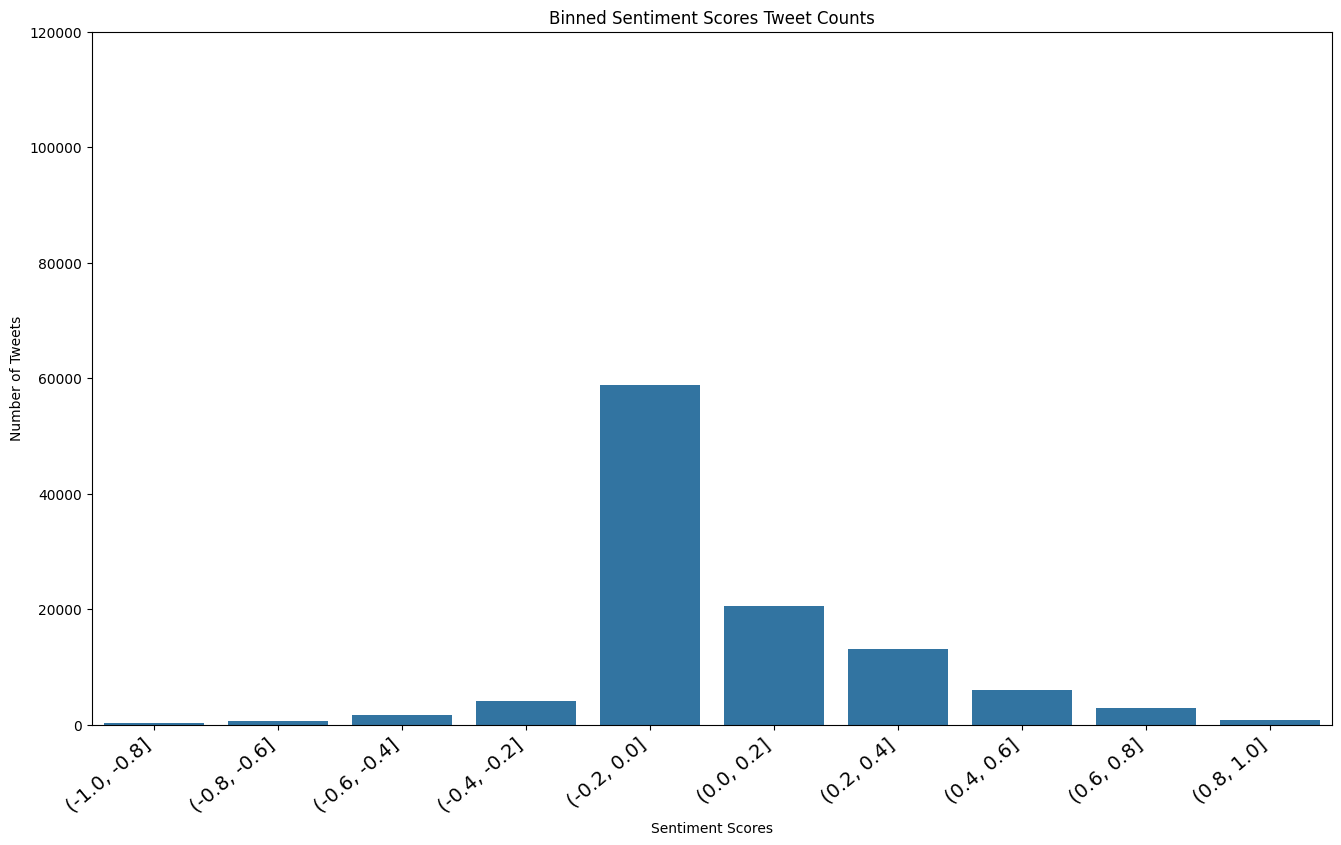

In [8]:
bins = [-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
tweets_df['bin'] = pd.cut(tweets_df['sentiment_score'], bins)

plt.figure(figsize=(16,9))
ax = sns.countplot(x=tweets_df['bin'])
ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Sentiment Scores')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=14)
ax.set_title('Binned Sentiment Scores Tweet Counts')
ax.set_ylim(0, 120000)
plt.show()

In [9]:
daily_sentiment_scores_df = tweets_df[['date', 'sentiment_score']].resample('D', on='date').mean()

C:\Users\gsaik\AppData\Local\Temp\ipykernel_9120\119740577.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


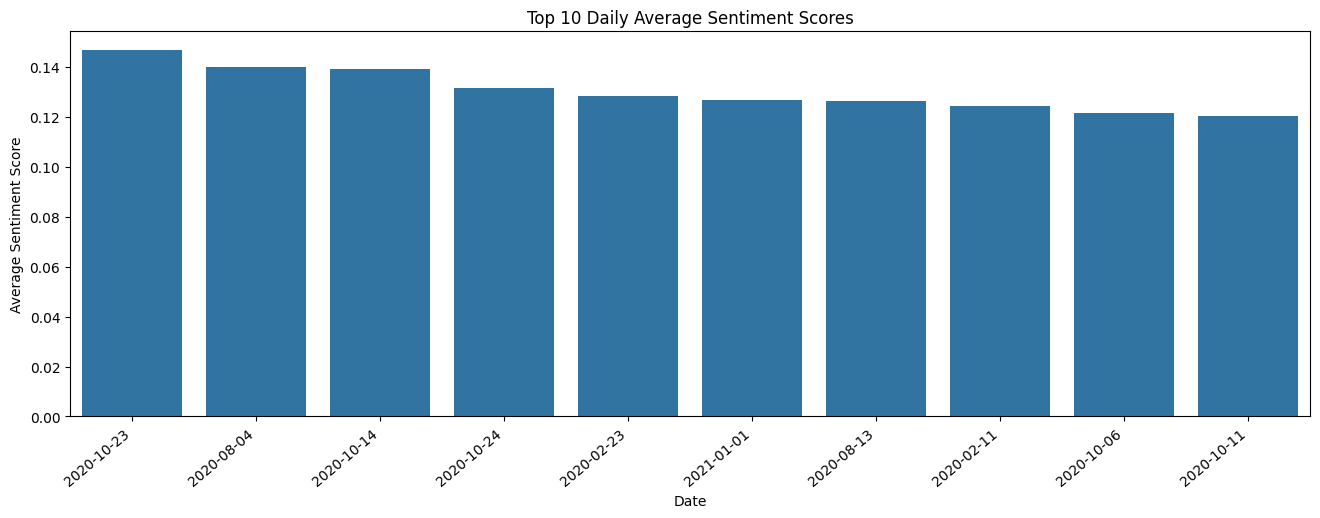

In [10]:
top_avg_df = daily_sentiment_scores_df.nlargest(columns='sentiment_score', n=10)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_avg_df, x=top_avg_df.index.date, y=top_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score')
ax.set_xlabel('Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title('Top 10 Daily Average Sentiment Scores')
plt.show()

C:\Users\gsaik\AppData\Local\Temp\ipykernel_9120\3896854689.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


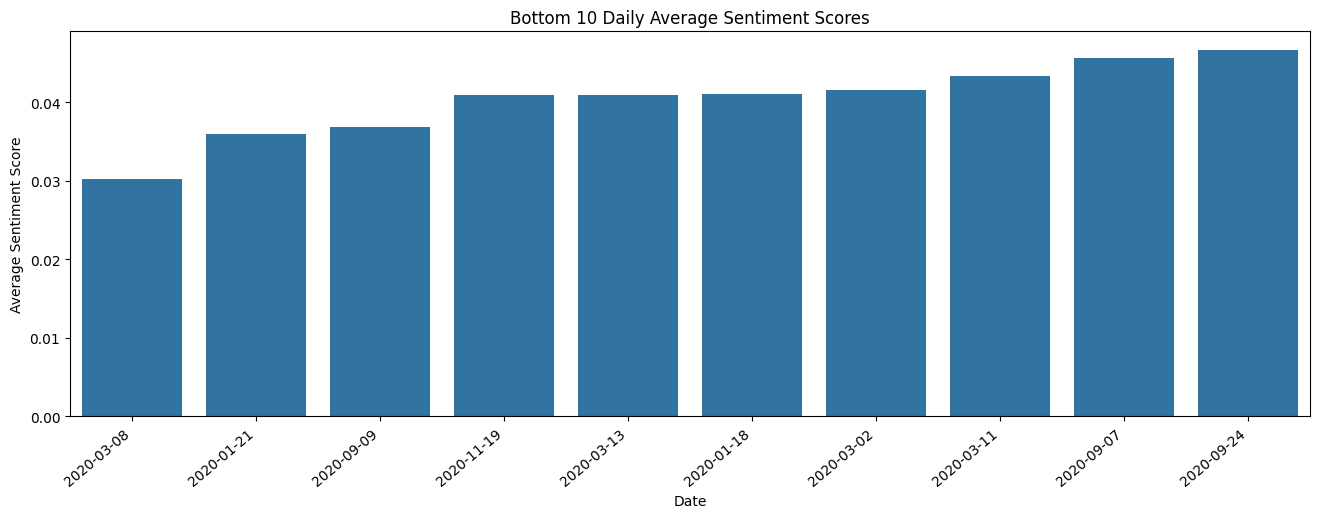

In [11]:
bottom_avg_df = daily_sentiment_scores_df.nsmallest(columns='sentiment_score', n=10)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=bottom_avg_df, x=bottom_avg_df.index.date, y=bottom_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score')
ax.set_xlabel('Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title('Bottom 10 Daily Average Sentiment Scores')
plt.show()

In [13]:
tweets_df1 = tweets_df[tweets_df.sentiment_score != 0]
tweets_df1 = tweets_df1.groupby('date', as_index=False)[['sentiment_score']].mean()

In [14]:
daily_sentiment_scores_df['sentiment_score_final'] = tweets_df1.sentiment_score.values
daily_sentiment_scores_df.to_csv('daily-avg-sentiment-scores.csv')